# Project4: Loan Application Status Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing CSV file

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Observation:

1.Independent Variables:
Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,
Credit History,Property_Area

2.Dependent Variable (Target Variable):

Loan_Status

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print('The number of Rows and Columns in the dataset is:',df.shape)

The number of Rows and Columns in the dataset is: (614, 13)


In [5]:
print('The number of duplicate rows are:',df.duplicated().sum())

The number of duplicate rows are: 0


Observation

Dataset doesnot contain Any duplicate entry. 

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observation

1.In loan application status dataset we have 614 rows with 13 columns including target variable.

2.A Target Variable is 'Loan_Status' having object datatype and It is categorical variable.

3.Gender, Married, Education,Self Employed, Credit History, Loan Status are categorical features.

4.There are three types of datatype dtypes: float64(4), int64(1), object(8)

# Checking Null Values

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observation

1.7 out 13 columns contains missing value.

2.As small amount of data is missing so we use mean amd mode to handle the problem ofNaN values

<AxesSubplot:>

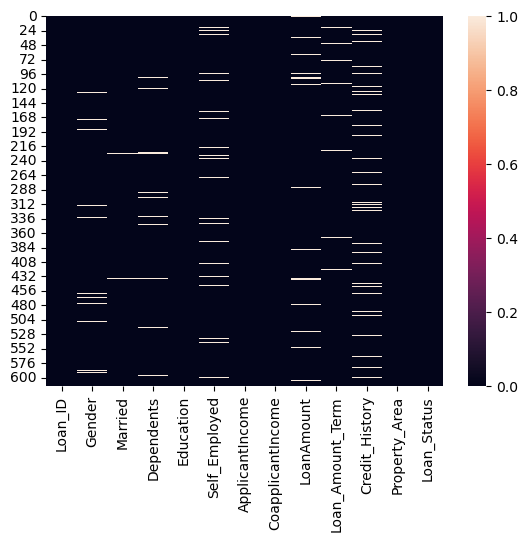

In [10]:
sns.heatmap(df.isnull())

# Splitting data into categorical set

In [11]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print('Categorical column:',categorical_col)
print('\n')


Categorical column: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']




# Visualizing Categorical Data

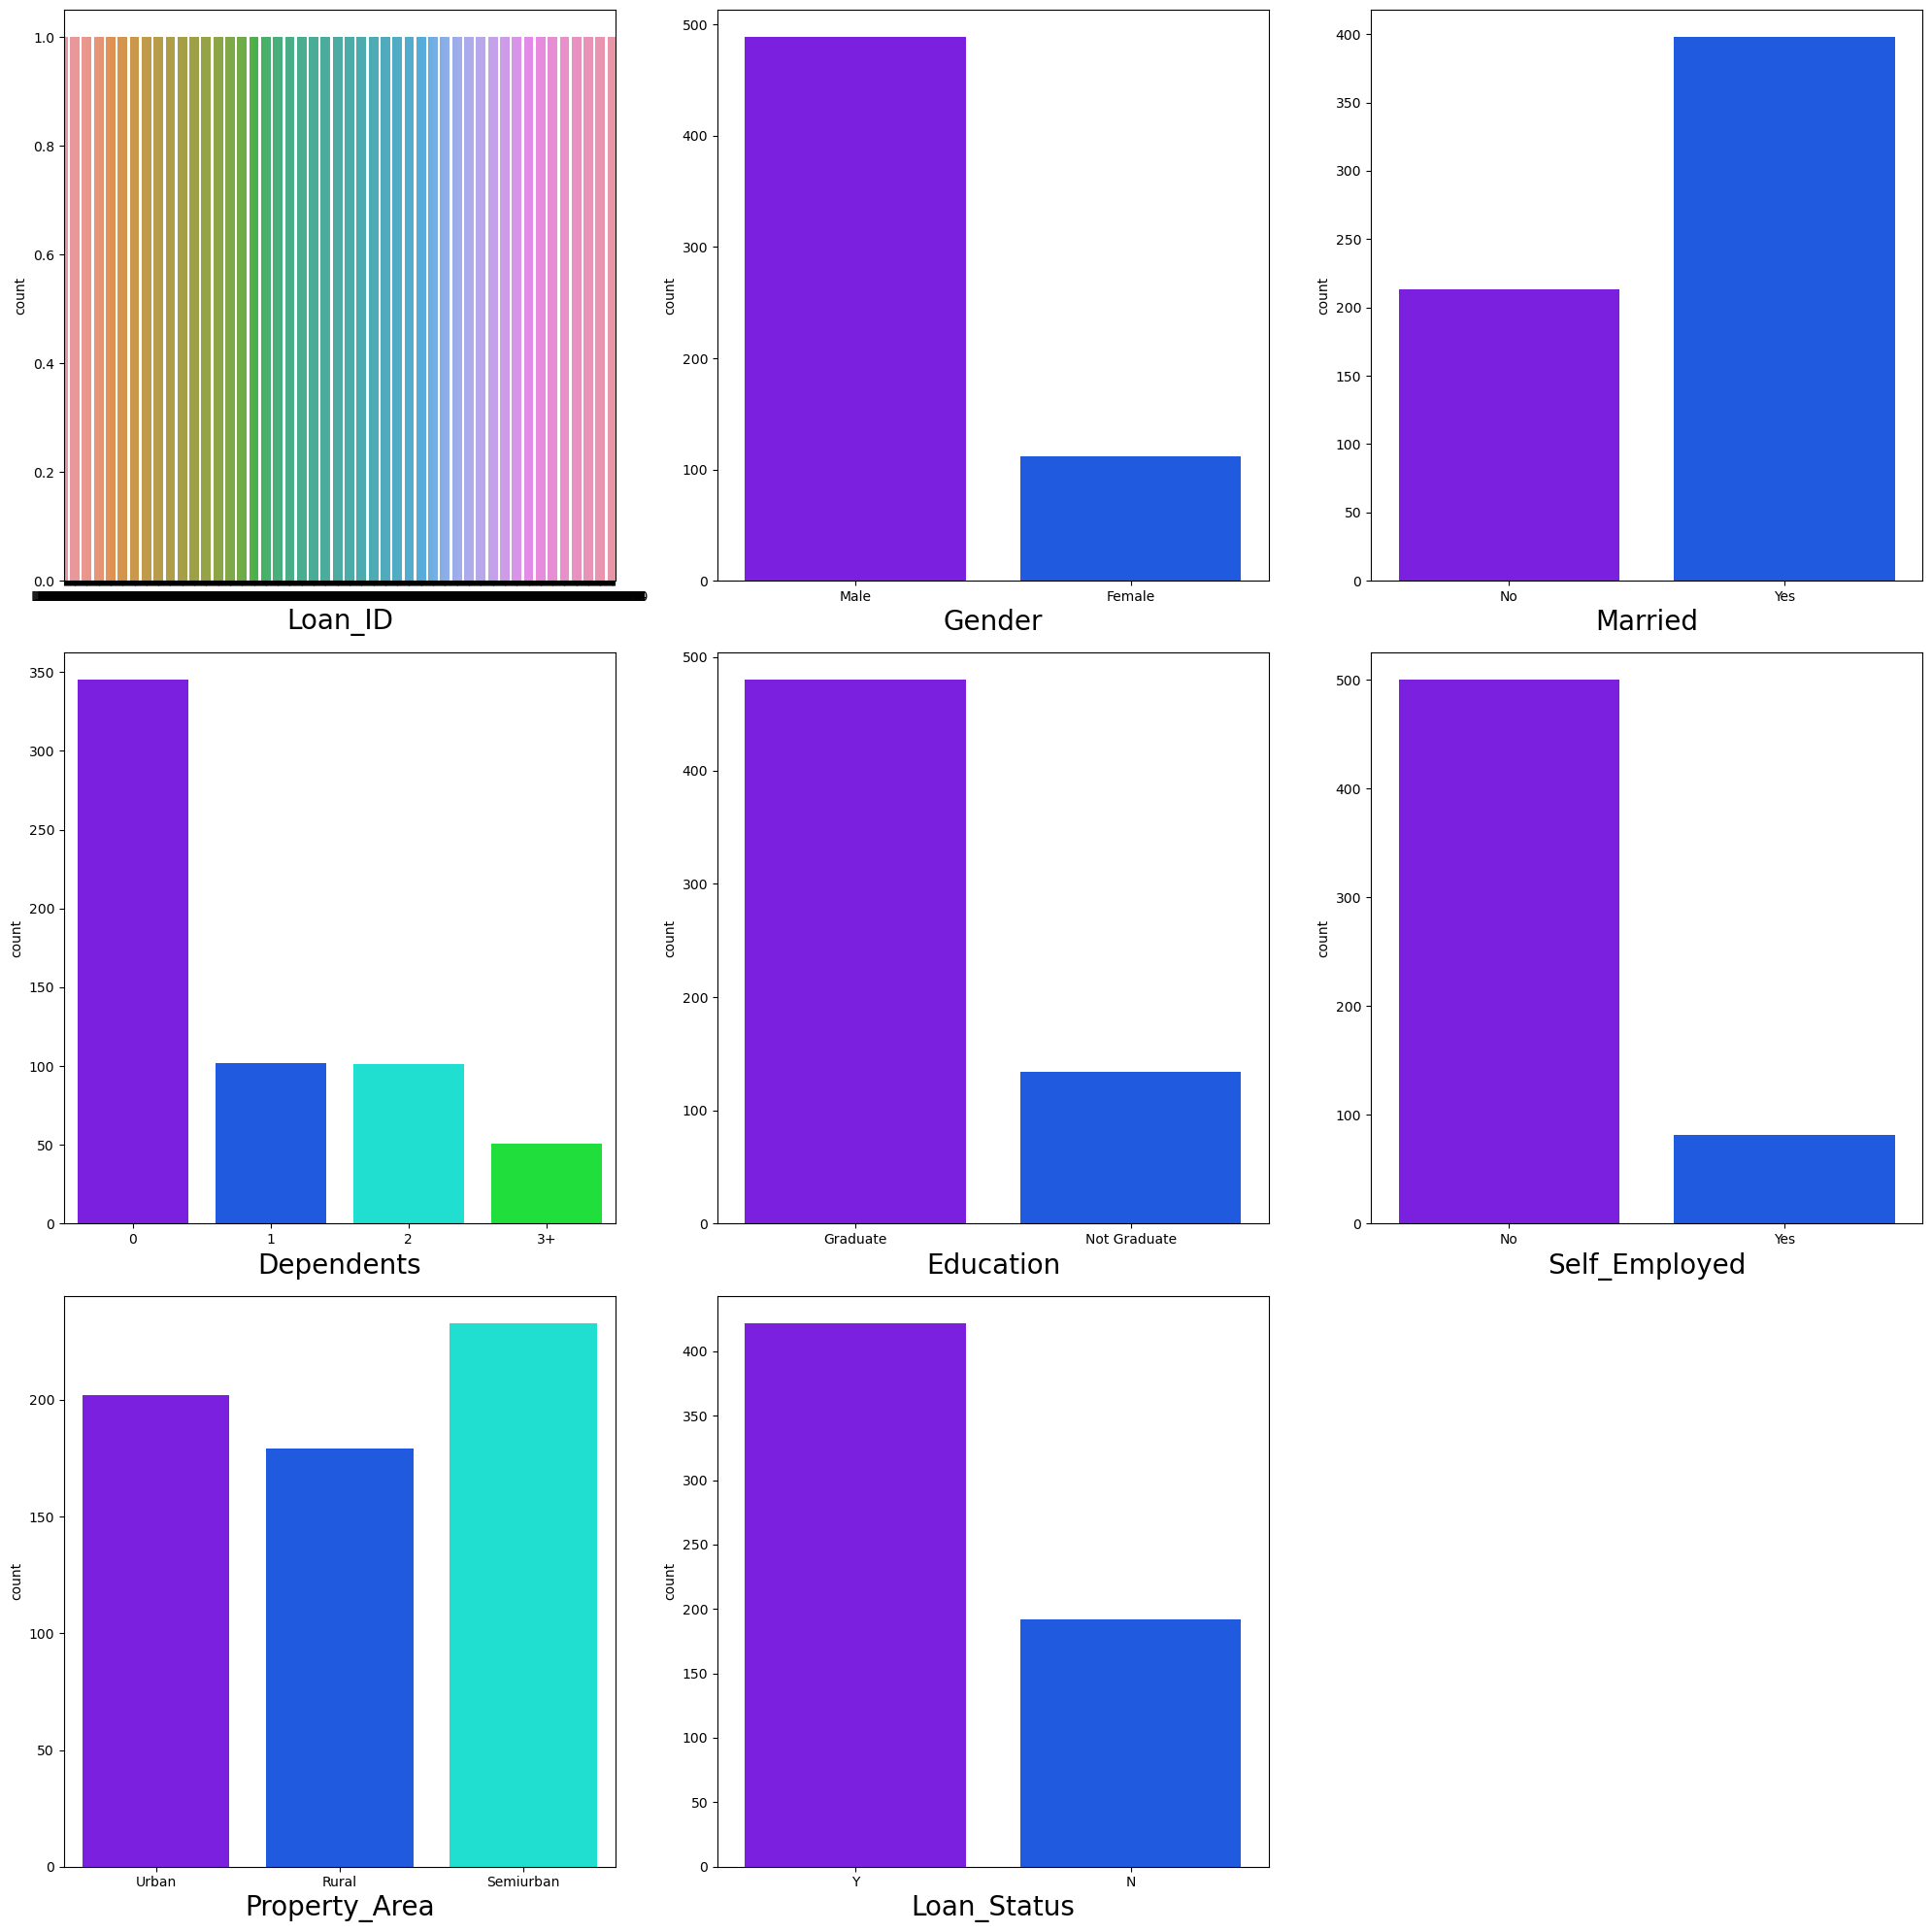

In [12]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for i in categorical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

Observation:

1.Out of Total loan application 80 % applicants are Male. We can Explore loan amount for each gender applied.
2.Only 20% applicants are self employed. So it will interesting to gain insight on relation between Applicant income and 
loan approval for non self employed category.
3.Nearly 70% are married and 75% of loan applicants are graduates
4.Almost 60% of the applicants have no dependents.
5.Most of applicants come from Semi Urban areas, followed by Urban and Rural areas.
6.80% people previously have credit history. 
7.Nearly 70 % applicant gets loan approved.

# Filling Null Values

In [13]:
# Imputating Missing value with mode for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

Observation:

1.Missing values in Loan amount is impute with median value.

2.Credit History, Self Employed, dependents, Gender and Married are replace with mode of repective features.

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Statistical Summary

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


Observation:

1.In Applicant Income & Coapplicant Income Std deviation value is greater than median. So data is spread and skewed.

2.Taking 75% and Max rows into consideration we can surely say that Outliers exist in Applicant Income,
Coapplicant Income,Loan Amount.

3.Since Credit History is Categorical variable there is no significance in different statstical parameter of it.

4.Minimum Tenure for Loan is 12 Months and Maximum Loan tenure is 480 Months.

5.Minimum Applicant income is 150 and maximum is 81000.

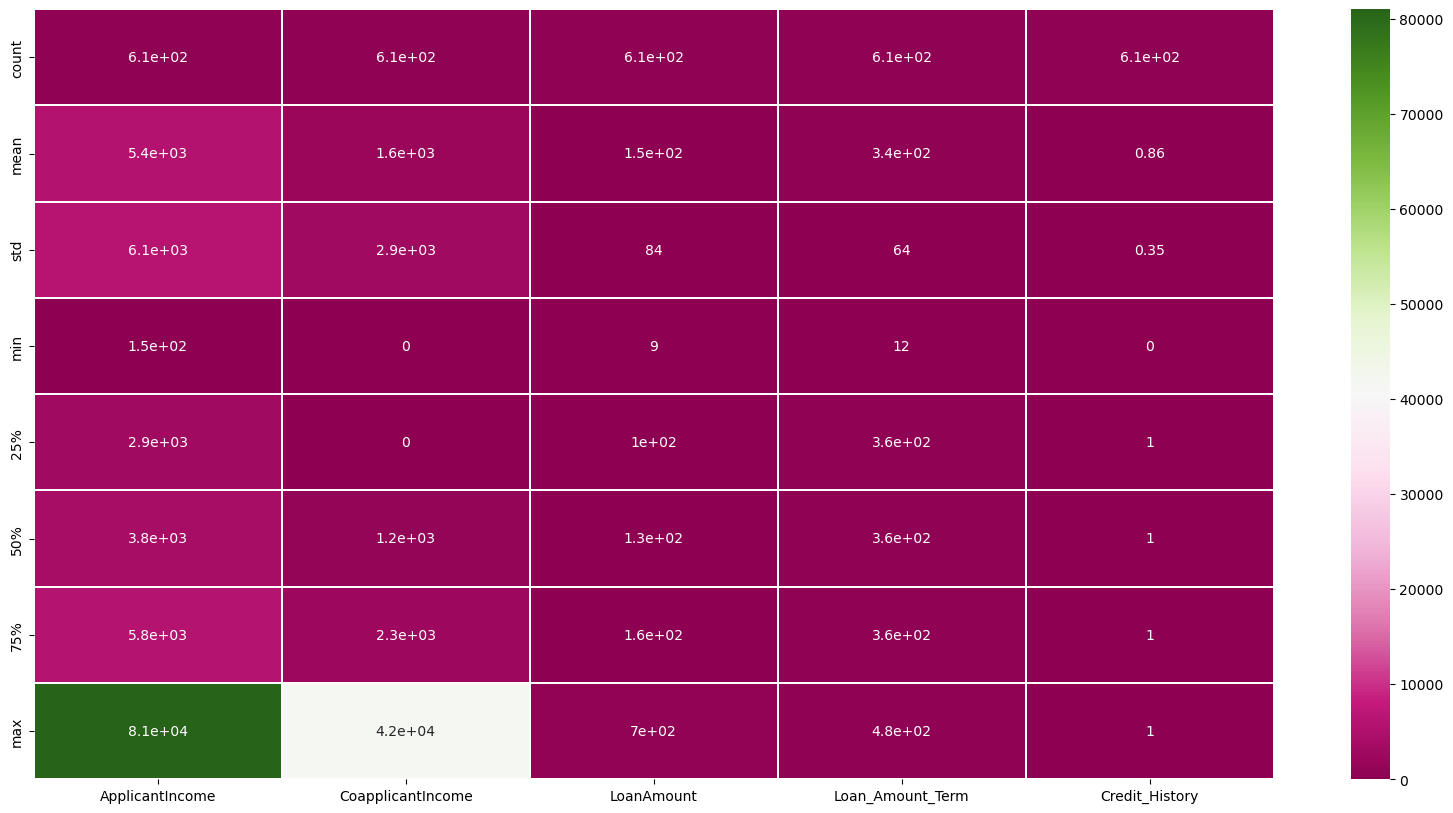

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,cmap='PiYG',linewidth=0.1)
plt.show()

# Checking Unique Values

In [18]:
df.nunique().to_frame('No of unique values')

,No of unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


# Data Visualisation

# Bivariate Analysis

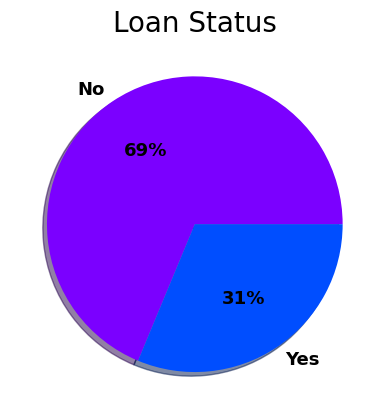

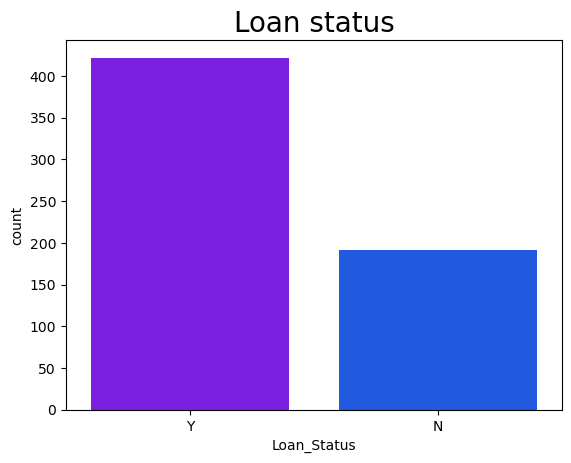

In [19]:
plt.title('Loan Status',fontsize=20)
plt.pie(df['Loan_Status'].value_counts(),labels=['No','Yes'],autopct='%.0f%%',
        textprops ={ 'fontweight': 'bold','fontsize':13},shadow=True)
plt.show()


sns.countplot('Loan_Status',data=df)
plt.title('Loan status',fontsize=20)
plt.show()

# Gender VS Loan Status

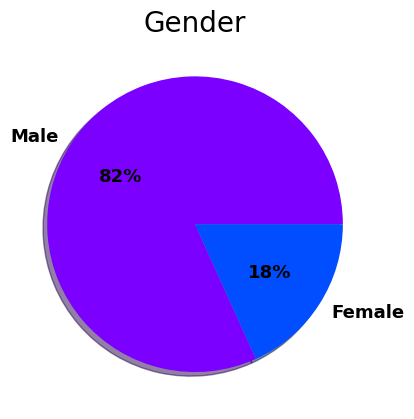

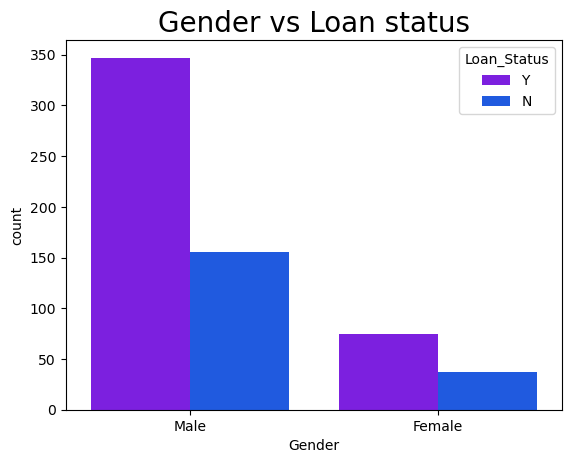

In [20]:


plt.title('Gender',fontsize=20)
plt.pie(df['Gender'].value_counts(),labels=['Male','Female'],autopct='%.0f%%',
        textprops ={ 'fontweight': 'bold','fontsize':13},shadow=True)
plt.show()

sns.countplot('Gender',hue='Loan_Status',data=df)
plt.title('Gender vs Loan status',fontsize=20)
plt.show()


Observation:

81.8% Applicant are male.

Irrespective Gender 65 % Applicant from each gender gets loan approval.

# Married VS Loan Status

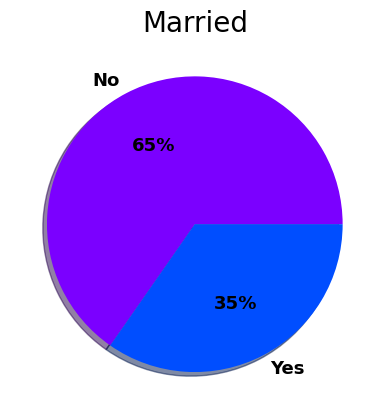

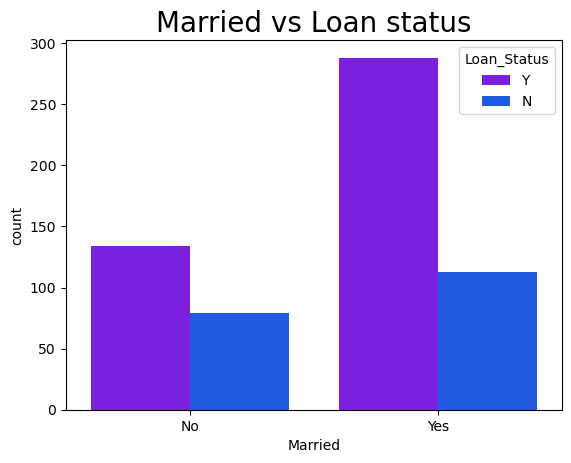

In [21]:
plt.title('Married',fontsize=20)
plt.pie(df['Married'].value_counts(),labels=['No','Yes'],autopct='%.0f%%',
        textprops ={ 'fontweight': 'bold','fontsize':13},shadow=True)
plt.show()

sns.countplot('Married',hue='Loan_Status',data=df)
plt.title('Married vs Loan status',fontsize=20)
plt.show()

Observation:

1.65.3 % loan applicants are married.

2.We can see from Count plot that Married people have more possibility of getting loan approval.

# Dependents VS Loan Status

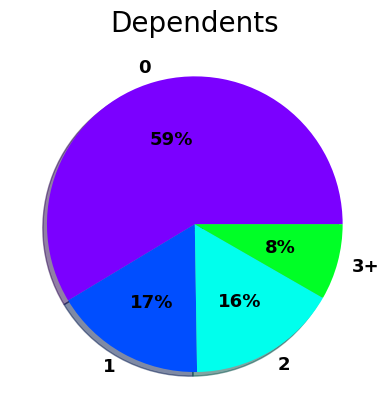

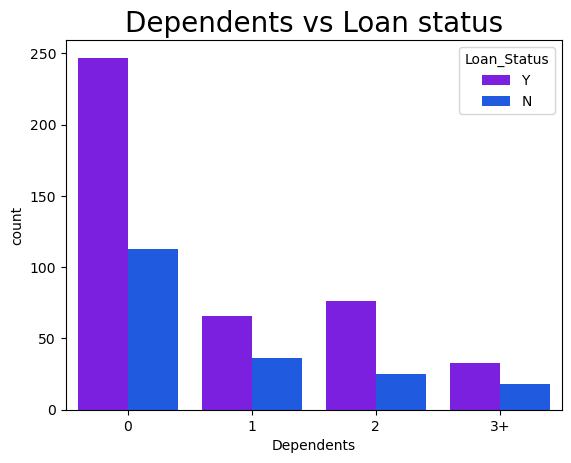

In [22]:
plt.title('Dependents',fontsize=20)
plt.pie(df['Dependents'].value_counts(),labels=['0','1','2','3+'],autopct='%.0f%%',
        textprops ={ 'fontweight': 'bold','fontsize':13},shadow=True)
plt.show()

sns.countplot('Dependents',hue='Loan_Status',data=df)
plt.title('Dependents vs Loan status',fontsize=20)
plt.show()

Observation:

1.59% Applicants have no dependents on them.41% Applicants have either 1 or 2 dependents. 


# Education VS Loan Status

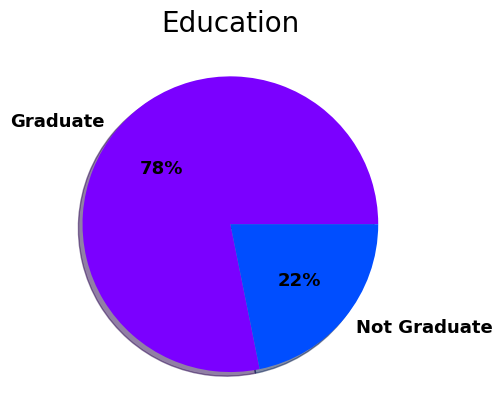

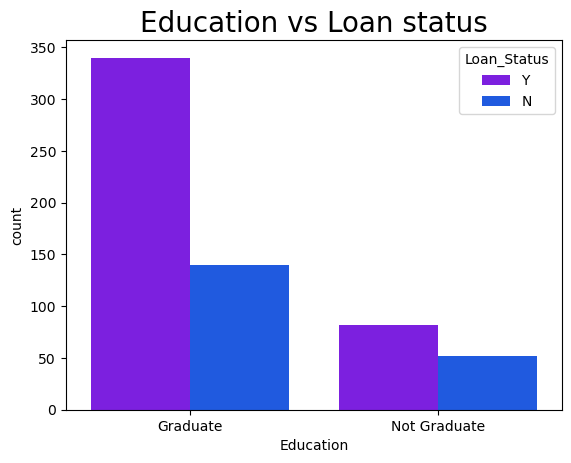

In [23]:
plt.title('Education',fontsize=20)
plt.pie(df['Education'].value_counts(),labels=['Graduate','Not Graduate'],autopct='%.0f%%',
        textprops ={ 'fontweight': 'bold','fontsize':13},shadow=True)
plt.show()

sns.countplot('Education',hue='Loan_Status',data=df)
plt.title('Education vs Loan status',fontsize=20)
plt.show()

Observation:

Graduate applicants are more likely to get loan approval irrespective gender than non garduates.

# Self Employed VS Loan Status

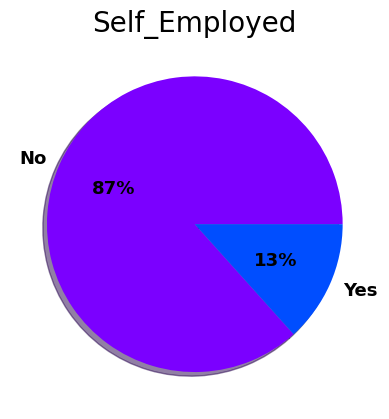

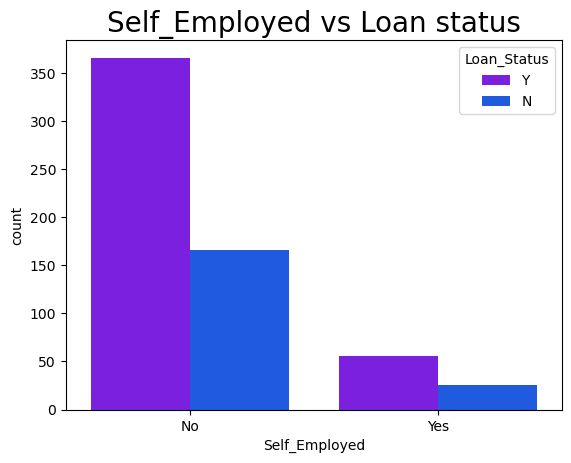

In [24]:
plt.title('Self_Employed',fontsize=20)
plt.pie(df['Self_Employed'].value_counts(),labels=['No','Yes'],autopct='%.0f%%',
        textprops ={ 'fontweight': 'bold','fontsize':13},shadow=True)
plt.show()

sns.countplot('Self_Employed',hue='Loan_Status',data=df)
plt.title('Self_Employed vs Loan status',fontsize=20)
plt.show()

Observation:

1.Most of the peoples are not self- employed

2.Loan status 'YES' more for not self_employed

# Property Area VS Loan Status

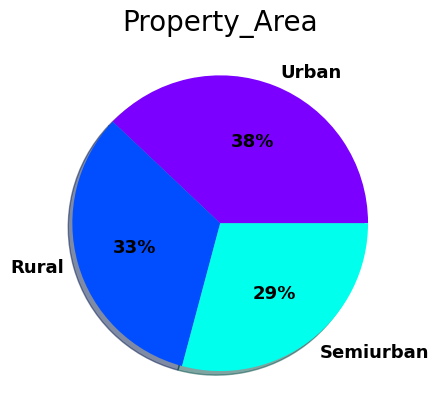

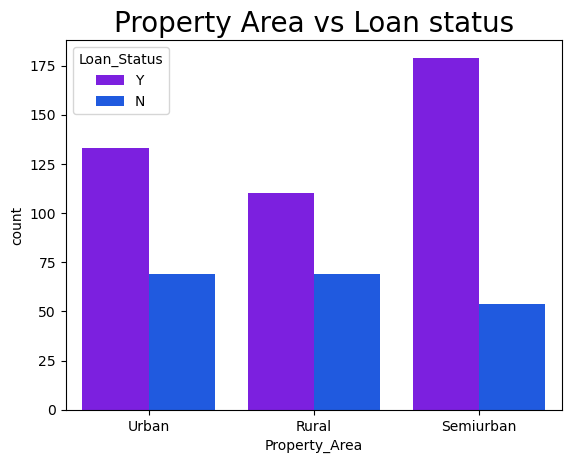

In [25]:
plt.title('Property_Area',fontsize=20)
plt.pie(df['Property_Area'].value_counts(),labels=['Urban','Rural','Semiurban'],autopct='%.0f%%',
        textprops ={ 'fontweight': 'bold','fontsize':13},shadow=True)
plt.show()

sns.countplot('Property_Area',hue='Loan_Status',data=df)
plt.title('Property Area vs Loan status',fontsize=20)
plt.show()

Observation:

1.Column contains three value:- Urban, semiurban, rural
    
2.Percentage value of loan approved for semiurbans are more than urban and rural.

# Encoding Categorical Data into numerical

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le=LabelEncoder()
for i in categorical_col:
    df[i]=le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Multivariate Analysis

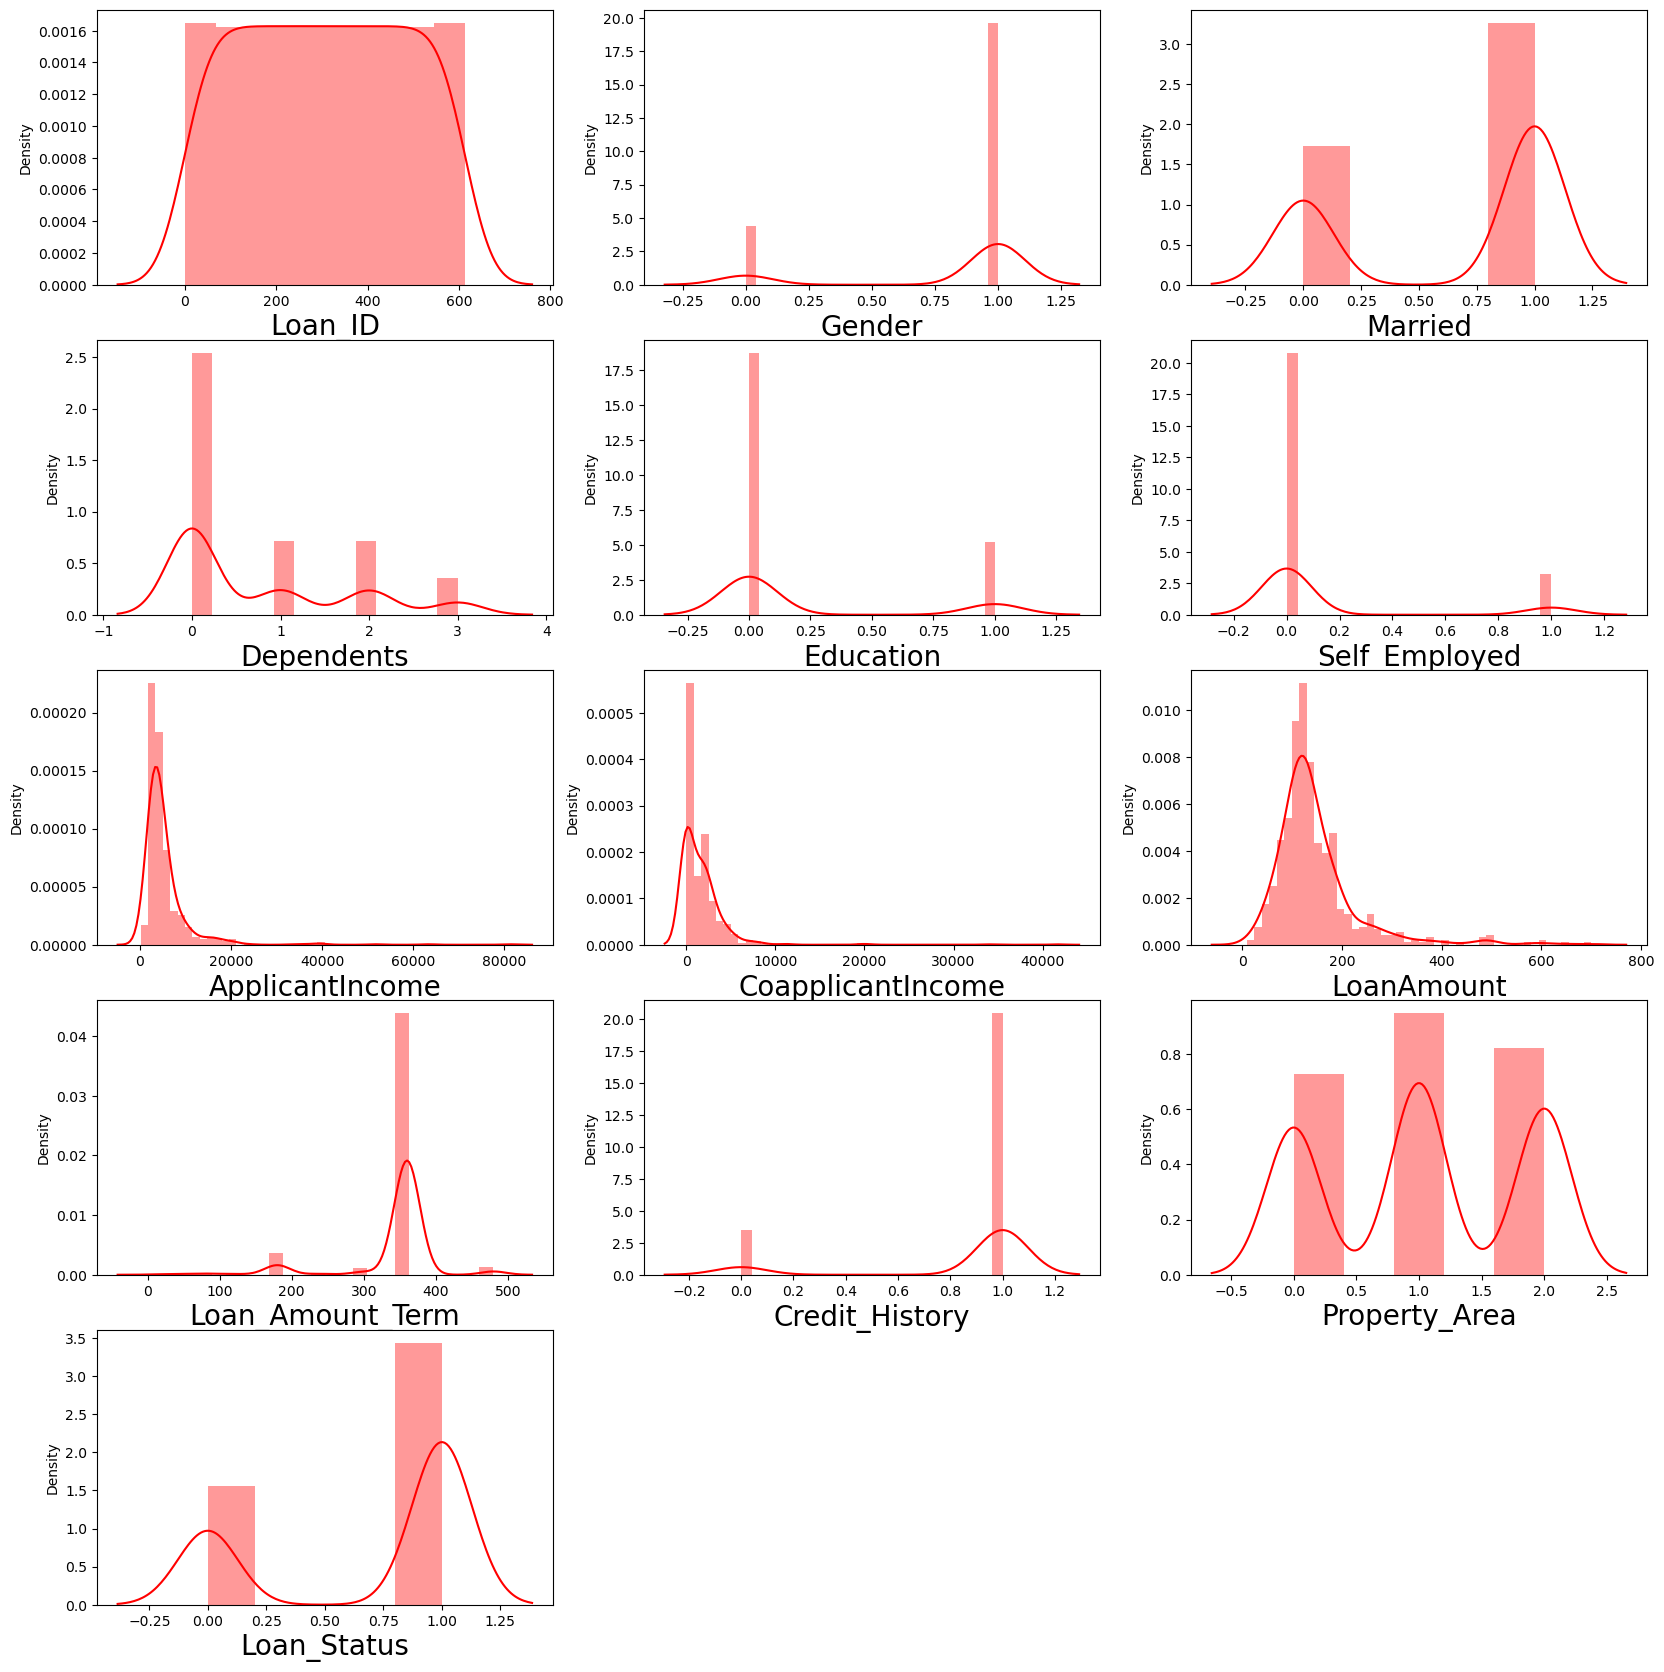

In [28]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column], color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


# Checking Outliers

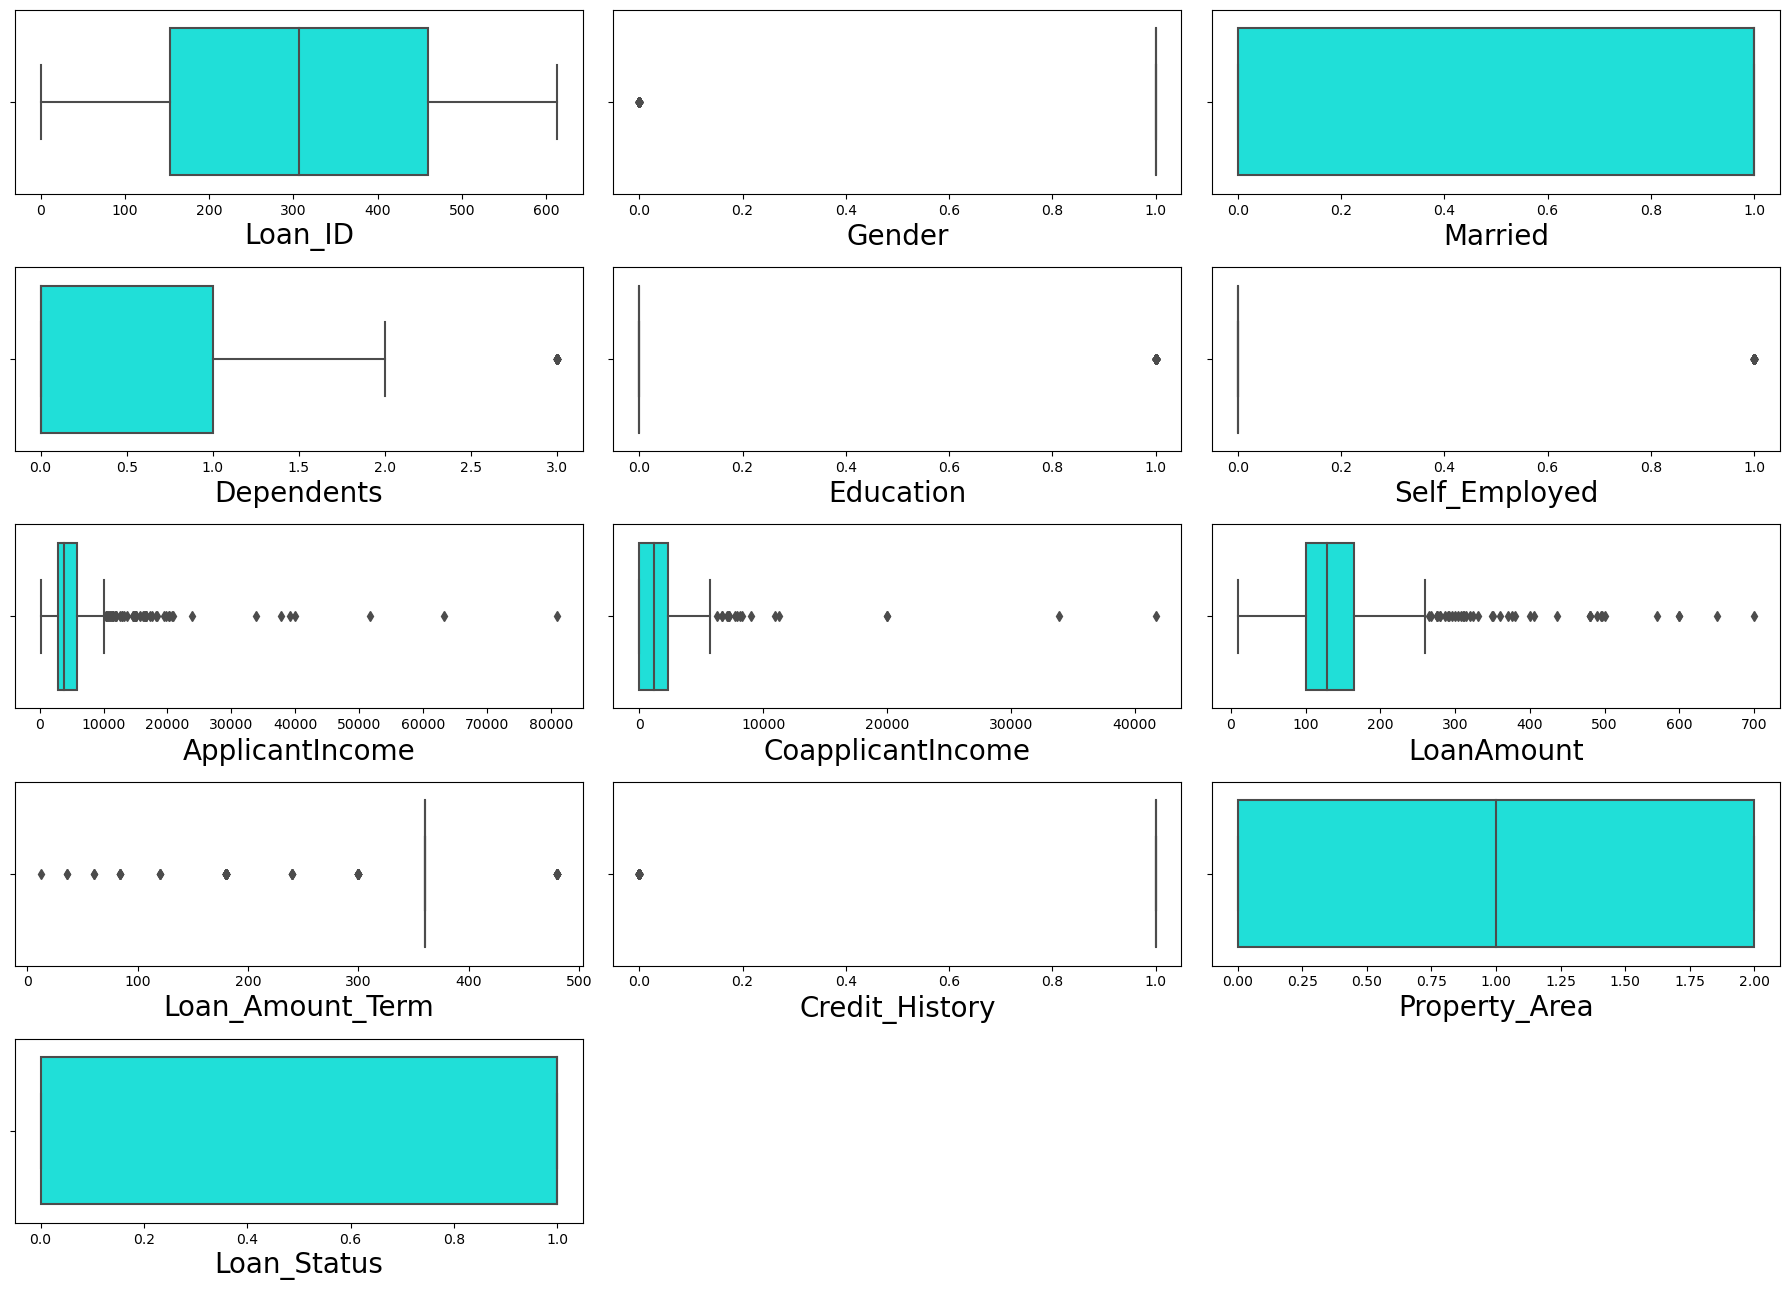

In [29]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()


# Dropping Unnecessary Columns

In [30]:
df.drop(["Loan_ID"], axis=1, inplace=True)

In [31]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Removing Outliers

In [32]:
from scipy.stats import zscore

In [33]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)


Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)


# Skewness

In [35]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Observation:

1.Out of all above feature 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are skewed which are numerical feature.

2.Other features are categorical in nature so skewness is nothing to do with these remaining feature.We will ignore them.

3.We will use power transformation method to remove skewness.

In [36]:
# Splitting data in target and dependent feature
x = df.drop(['Loan_Status'], axis =1)
y = df['Loan_Status']

# Solving Problem Of Skewness Through Power Transform

In [37]:
from sklearn.preprocessing import power_transform

In [38]:
df = power_transform(x)
df = pd.DataFrame(df, columns=x.columns)
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.441404
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.020831
Loan_Amount_Term     0.392571
Credit_History      -2.021971
Property_Area       -0.158267
dtype: float64

Observation:

All the features have skewness within  the range so no need to worry about it

# Correlation

In [39]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,1.000000,0.364569,0.162937,0.045364,-0.000525,0.087227,0.219590,0.142137,-0.080405,0.009170,-0.030017
Married,0.364569,1.000000,0.355531,0.012304,0.004489,0.016968,0.312596,0.179350,-0.123179,0.010938,0.004488
Dependents,0.162937,0.355531,1.000000,0.044038,0.079245,0.112222,0.014861,0.154627,-0.114250,-0.026755,0.032672
Education,0.045364,0.012304,0.044038,1.000000,-0.010383,-0.178206,0.038406,-0.149533,-0.057505,-0.073658,-0.066829
Self_Employed,-0.000525,0.004489,0.079245,-0.010383,1.000000,0.185468,-0.089864,0.111002,-0.038754,-0.001550,-0.030541
ApplicantIncome,0.087227,0.016968,0.112222,-0.178206,0.185468,1.000000,-0.367287,0.483447,-0.054431,0.012667,-0.029069
CoapplicantIncome,0.219590,0.312596,0.014861,0.038406,-0.089864,-0.367287,1.000000,0.136998,0.004565,0.007486,-0.056192
LoanAmount,0.142137,0.179350,0.154627,-0.149533,0.111002,0.483447,0.136998,1.000000,0.058125,-0.016884,-0.092462
Loan_Amount_Term,-0.080405,-0.123179,-0.114250,-0.057505,-0.038754,-0.054431,0.004565,0.058125,1.000000,-0.013188,-0.041790
Credit_History,0.009170,0.010938,-0.026755,-0.073658,-0.001550,0.012667,0.007486,-0.016884,-0.013188,1.000000,0.003371


<AxesSubplot:>

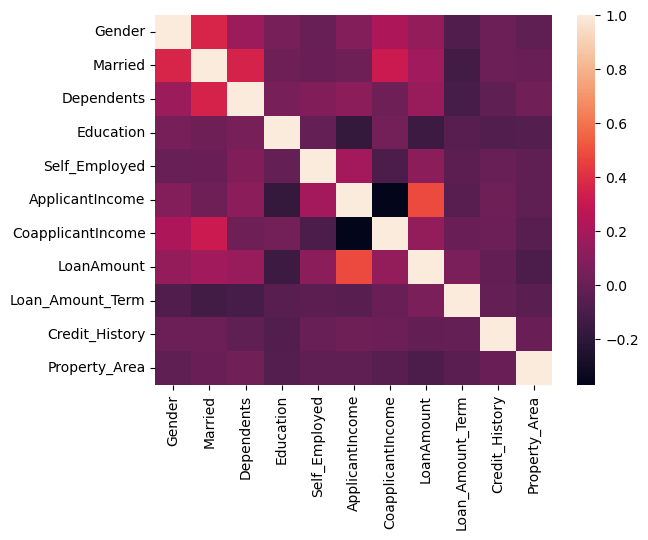

In [40]:
sns.heatmap(df.corr())

# Scaling Of Data

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.2732313 ,
         0.41173269, -1.31851281],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       [-2.11710719, -1.37208932, -0.73780632, ...,  0.2732313 ,
        -2.42876026, -0.04760721]])

# VIF For Checking Multicollinearity

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
vif 

,vif,features
0,1.169777,Gender
1,1.281442,Married
2,1.165143,Dependents
3,1.063286,Education
4,1.023660,Self_Employed
5,1.630659,ApplicantIncome
6,1.141732,CoapplicantIncome
7,1.711331,LoanAmount
8,1.049026,Loan_Amount_Term
9,1.008449,Credit_History


Observation:

1.All the  features VIF is within permissible limit of 10.

2.So No Need to Worry About Multicollinearity.

# Modelling Of Data

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (411, 11)
Training target vector size: (411,)
Test feature matrix size: (203, 11)
Test target vector size: (203,)


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8669950738916257 on Random_state 205


# Logistic Regression

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)

print('Accuracy Score of Logistics Regression :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix of Logistics Regression :',confusion_matrix(y_test, y_pred))
print('\n')
print('classification Report of Logistics Regression',classification_report(y_test, y_pred))

Accuracy Score of Logistics Regression : 0.7980295566502463


Confusion matrix of Logistics Regression : [[ 33  39]
 [  2 129]]


classification Report of Logistics Regression               precision    recall  f1-score   support

           0       0.94      0.46      0.62        72
           1       0.77      0.98      0.86       131

    accuracy                           0.80       203
   macro avg       0.86      0.72      0.74       203
weighted avg       0.83      0.80      0.78       203



# Decision Tree Classifier

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

print('Accuracy Score of Decision Tree Classifier :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix of Decision Tree Classifier :',confusion_matrix(y_test, y_pred))
print('\n')
print('classification Report of Decision Tree Classifier',classification_report(y_test, y_pred))

Accuracy Score of Decision Tree Classifier : 0.6896551724137931


Confusion matrix of Decision Tree Classifier : [[ 33  39]
 [ 24 107]]


classification Report of Decision Tree Classifier               precision    recall  f1-score   support

           0       0.58      0.46      0.51        72
           1       0.73      0.82      0.77       131

    accuracy                           0.69       203
   macro avg       0.66      0.64      0.64       203
weighted avg       0.68      0.69      0.68       203



# SVC

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

print('Accuracy Score of SVC :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix of SVC :',confusion_matrix(y_test, y_pred))
print('\n')
print('classification Report of SVC',classification_report(y_test, y_pred))

Accuracy Score of SVC : 0.645320197044335


Confusion matrix of SVC : [[  0  72]
 [  0 131]]


classification Report of SVC               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.65      1.00      0.78       131

    accuracy                           0.65       203
   macro avg       0.32      0.50      0.39       203
weighted avg       0.42      0.65      0.51       203



# KNeighbors Classifier

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

print('Accuracy Score of KNN :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix of KNN :',confusion_matrix(y_test, y_pred))
print('\n')
print('classification Report of KNN',classification_report(y_test, y_pred))

Accuracy Score of KNN : 0.5665024630541872


Confusion matrix of KNN : [[  8  64]
 [ 24 107]]


classification Report of KNN               precision    recall  f1-score   support

           0       0.25      0.11      0.15        72
           1       0.63      0.82      0.71       131

    accuracy                           0.57       203
   macro avg       0.44      0.46      0.43       203
weighted avg       0.49      0.57      0.51       203



# Extra Tree Classifier

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
y_pred=etc.predict(x_test)

print('Accuracy Score of Extra Tree Classifier :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix of Extra Tree Classifier :',confusion_matrix(y_test, y_pred))
print('\n')
print('classification Report of Extra Tree Classifier',classification_report(y_test, y_pred))

Accuracy Score of Extra Tree Classifier : 0.7783251231527094


Confusion matrix of Extra Tree Classifier : [[ 38  34]
 [ 11 120]]


classification Report of Extra Tree Classifier               precision    recall  f1-score   support

           0       0.78      0.53      0.63        72
           1       0.78      0.92      0.84       131

    accuracy                           0.78       203
   macro avg       0.78      0.72      0.74       203
weighted avg       0.78      0.78      0.77       203



# AdaBoost Classifier

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
y_pred=abc.predict(x_test)

print('Accuracy Score of Ada Boost Classifier :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix of Ada Boost Classifier :',confusion_matrix(y_test, y_pred))
print('\n')
print('classification Report of Ada Boost Classifier',classification_report(y_test, y_pred))

Accuracy Score of Ada Boost Classifier : 0.7881773399014779


Confusion matrix of Ada Boost Classifier : [[ 37  35]
 [  8 123]]


classification Report of Ada Boost Classifier               precision    recall  f1-score   support

           0       0.82      0.51      0.63        72
           1       0.78      0.94      0.85       131

    accuracy                           0.79       203
   macro avg       0.80      0.73      0.74       203
weighted avg       0.79      0.79      0.77       203



# Gradient Boosting Classifier

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)

print('Accuracy Score of Gradient Boosting Classifier:', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix of Gradient Boosting Classifier :',confusion_matrix(y_test, y_pred))
print('\n')
print('classification Report of Gradient Boosting Classifier',classification_report(y_test, y_pred))

Accuracy Score of Gradient Boosting Classifier: 0.7832512315270936


Confusion matrix of Gradient Boosting Classifier : [[ 33  39]
 [  5 126]]


classification Report of Gradient Boosting Classifier               precision    recall  f1-score   support

           0       0.87      0.46      0.60        72
           1       0.76      0.96      0.85       131

    accuracy                           0.78       203
   macro avg       0.82      0.71      0.73       203
weighted avg       0.80      0.78      0.76       203



# Random Forest Classifier

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=242, test_size=.33)
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

print('Accuracy Score of Random Forest Classifier :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix of  Random Forest Classifier :',confusion_matrix(y_test, y_pred))
print('\n')
print('classification Report of  Random Forest Classifier',classification_report(y_test, y_pred))

Accuracy Score of Random Forest Classifier : 0.8275862068965517


Confusion matrix of  Random Forest Classifier : [[ 31  24]
 [ 11 137]]


classification Report of  Random Forest Classifier               precision    recall  f1-score   support

           0       0.74      0.56      0.64        55
           1       0.85      0.93      0.89       148

    accuracy                           0.83       203
   macro avg       0.79      0.74      0.76       203
weighted avg       0.82      0.83      0.82       203



# ROC curve

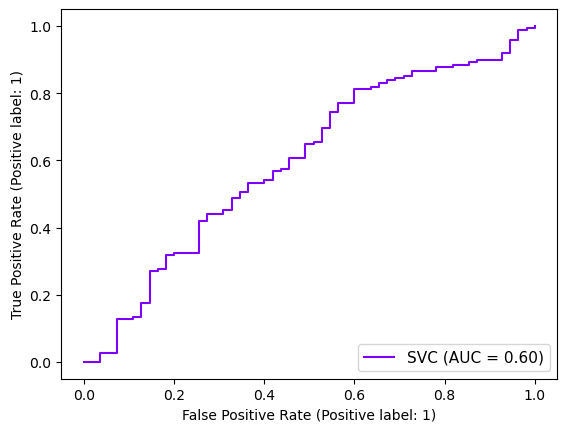

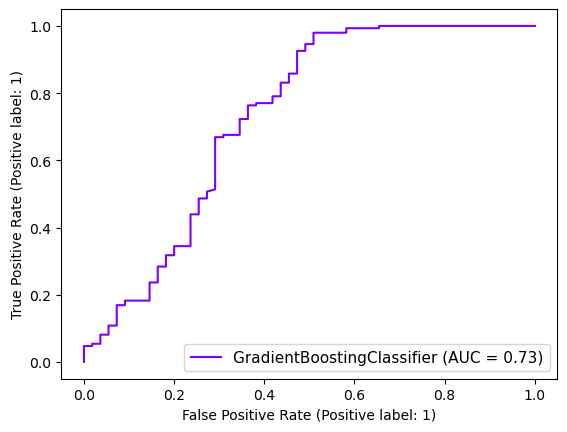

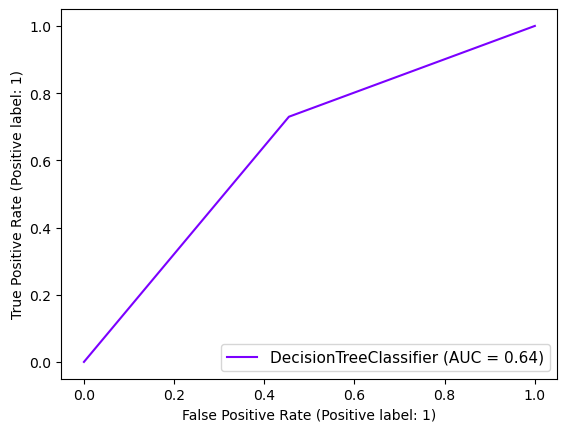

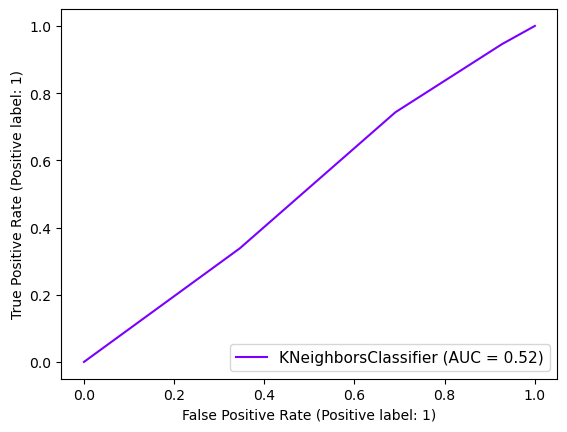

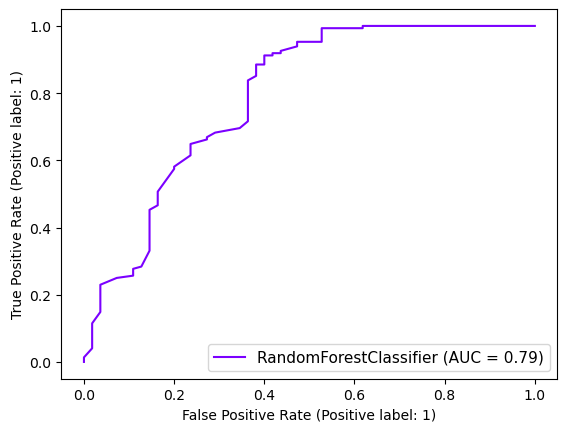

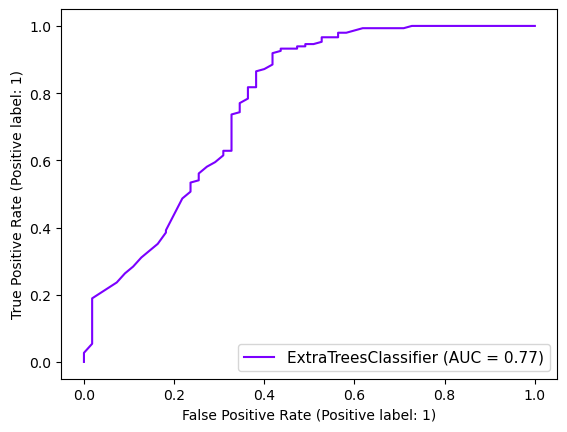

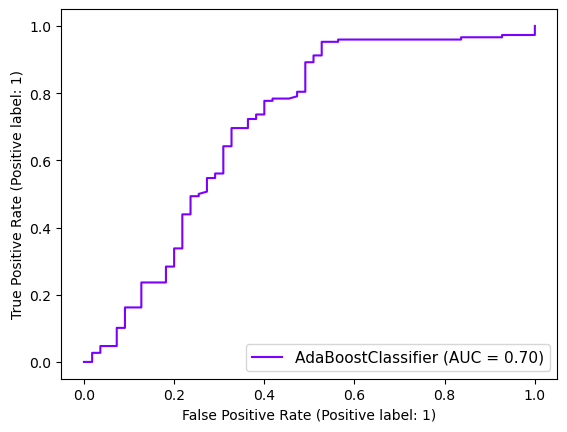

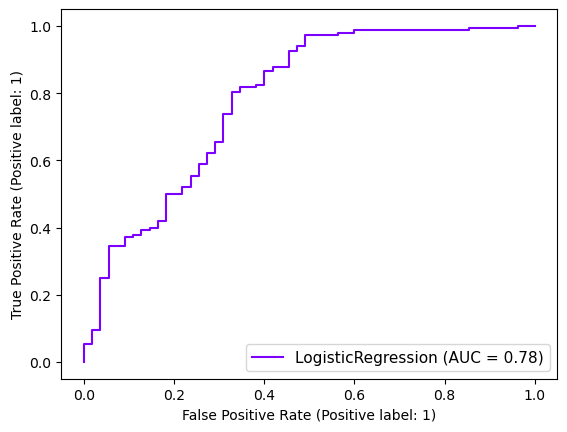

In [66]:
from sklearn.metrics import plot_roc_curve
model=[ 
        SVC(),
        GradientBoostingClassifier(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier(),
        AdaBoostClassifier(),
        LogisticRegression()]
for i in model:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    dist = plot_roc_curve(i,x_test,y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()

# Cross Val Score

In [67]:
from sklearn.model_selection import cross_val_score

In [74]:
model=[
       LogisticRegression(),
       SVC(),
       GradientBoostingClassifier(),
       DecisionTreeClassifier(),
       KNeighborsClassifier(n_neighbors = 3),
       RandomForestClassifier(),
       ExtraTreesClassifier(),
       AdaBoostClassifier() ]

for t in model:
    score = cross_val_score(t, x_scaled, y, cv =5)
    print('\n')
    print('Cross Validation Score', t)
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')



Cross Validation Score LogisticRegression()
Score : [0.81300813 0.77235772 0.7804878  0.84552846 0.81147541]
Mean Score : 0.8045715047314408
Std deviation : 0.02613068941485059




Cross Validation Score SVC()
Score : [0.81300813 0.7804878  0.7804878  0.82926829 0.81147541]
Mean Score : 0.8029454884712781
Std deviation : 0.01936802230984469




Cross Validation Score GradientBoostingClassifier()
Score : [0.7804878  0.71544715 0.77235772 0.83739837 0.78688525]
Mean Score : 0.7785152605624417
Std deviation : 0.038875879152651185




Cross Validation Score DecisionTreeClassifier()
Score : [0.7398374  0.6504065  0.74796748 0.74796748 0.74590164]
Mean Score : 0.7264161002265761
Std deviation : 0.03812138533566315




Cross Validation Score KNeighborsClassifier(n_neighbors=3)
Score : [0.76422764 0.76422764 0.75609756 0.79674797 0.7704918 ]
Mean Score : 0.7703585232573638
Std deviation : 0.013964032213748914




Cross Validation Score RandomForestClassifier()
Score : [0.78861789 0.75609756 

# We came to know that Ranom Forest Classifier has highest accuracy amomg all.

# Grid Search CV

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50, None], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,100]}

In [77]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 100]},
             verbose=3)

In [78]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 100}

# Final Model

In [79]:
Model=RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 100, max_depth=5 ,max_features='log2')
Model.fit(x_train,y_train)

print('Accuracy Score :', accuracy_score(y_test, y_pred))

Accuracy Score : 0.8374384236453202


In [80]:
import joblib
import pickle

In [82]:
filename='Loan Application Status.pkl'
pickle.dump(Model,open(filename,'wb'))